# U1B model: neutrino masses inversion + DM scan

The idea is to do a firts DM random scand

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time
import sys

%matplotlib inline
import matplotlib.pyplot as plt 

In [2]:
import pyslha
import pyU1B_LesHouches_generator
import neutrino_analytic_v2
import NEUTRINO2018

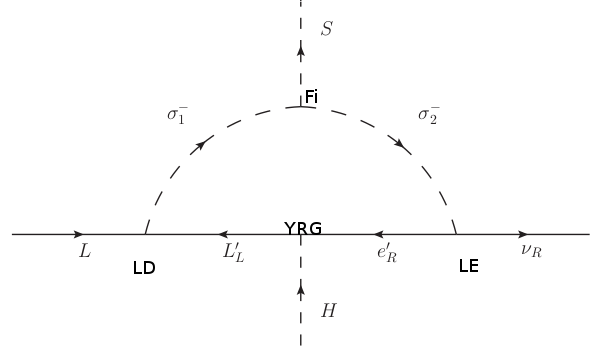

In [3]:
from IPython.display import Image
Image("zee-couplings.png")

Run diccionary 

In [67]:
# Tiempo inicial
t1=time.time() 

x=[]

Num = 10

for i in range(0,Num):
    #print(i)
    #opend the dictionary
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Benchmark point i-esimo    
    Lambda2 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L2 conj[bi].bi.conj[bi].bi
    Lambda3 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #L3 conj[bi].bi.conj[H].H
    Lambda4 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L4 conj[bj].bj.conj[bj].bj
    Lambda5 = -np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #L5 conj[bj].bj.conj[H].H 
    muj = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(9)))) #muj conj[bj].bj   
    YA1 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YA1 conj[bi].x3.x4
    YA2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YA2 conj[bj].x3.x4
    YB1 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YB1 bi.x5.x6
    YB2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YB2 bj.x5.x6
    YC1 = np.exp(np.random.uniform(np.log(1.*10**(-2)),np.log(10**(0)))) #YC1 conj[bi].lp.lpp : control the Fvv mass
    YC2 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YC2 conj[bj].lp.lpp 
    YRG = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YRG conj[H].x5.lp 
    YRH = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #YRH H.x6.lpp
    vx = np.random.uniform(500,12000) # VEV of Phi
    g1p = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #U1B coupling
    
    Fi11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0)))) #Fi conj[S1].S2.conj[bi]
    Fi12 = 0.0
    Fi21 = 0.0
    Fi22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    
    Fj11 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #Fj conj[S1].S2.conj[bj]
    Fj12 = 0.0
    Fj21 = 0.0
    Fj22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1))))
    
    L611 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #L6 conj[S1].S1.conj[H].H
    L612 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L621 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L622 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    
    L711 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) #L7 conj[S2].S2.conj[H].H
    L712 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L721 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    L722 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(-1)))) 
    
    M111 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(8)))) #m1 conj[S1].S1
    M112 = 0. 
    M121 = 0. 
    M122 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(8)))) 
    
    M211 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(8)))) #m2 conj[S2].S2
    M212 = 0. 
    M221 = 0. 
    M222 = np.exp(np.random.uniform(np.log(1.*10**(6)),np.log(10**(8)))) 
    
    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # Lambda3INPUT'%Lambda3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # Lambda4INPUT'%Lambda4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # Lambda5INPUT'%Lambda5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # mujINPUT'%muj   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[8]='%.6E    # YA2INPUT'%YA2
    xdict.blocks['MINPAR'].entries[9]='%.6E    # YB1INPUT'%YB1
    xdict.blocks['MINPAR'].entries[10]='%.6E    # YB2INPUT'%YB2 
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[12]='%.6E    # YC2INPUT'%YC2    
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[14]='%.6E    # YRHINPUT'%YRH
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    xdict.blocks['MINPAR'].entries[16]='%.6E    # g1pINPUT'%g1p

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['FJIN'].entries[1,1]='%.6E    # Fj(1,1)'%Fj11
    xdict.blocks['FJIN'].entries[1,2]='%.6E    # Fj(1,2)'%Fj12
    xdict.blocks['FJIN'].entries[2,1]='%.6E    # Fj(2,1)'%Fj21
    xdict.blocks['FJIN'].entries[2,2]='%.6E    # Fj(2,2)'%Fj22
    
    xdict.blocks['L6IN'].entries[1,1]='%.6E    # lam6(1,1)'%L611
    xdict.blocks['L6IN'].entries[1,2]='%.6E    # lam6(1,2)'%L612
    xdict.blocks['L6IN'].entries[2,1]='%.6E    # lam6(2,1)'%L621
    xdict.blocks['L6IN'].entries[2,2]='%.6E    # lam6(2,2)'%L622
    
    xdict.blocks['L7IN'].entries[1,1]='%.6E    # lam7(1,1)'%L711
    xdict.blocks['L7IN'].entries[1,2]='%.6E    # lam7(1,2)'%L712
    xdict.blocks['L7IN'].entries[2,1]='%.6E    # lam7(2,1)'%L721
    xdict.blocks['L7IN'].entries[2,2]='%.6E    # lam7(2,2)'%L722
    
    xdict.blocks['M1IN'].entries[1,1]='%.6E    # m1(1,1)'%M111
    xdict.blocks['M1IN'].entries[1,2]='%.6E    # m1(1,2)'%M112
    xdict.blocks['M1IN'].entries[2,1]='%.6E    # m1(2,1)'%M121
    xdict.blocks['M1IN'].entries[2,2]='%.6E    # m1(2,2)'%M122
    
    xdict.blocks['M2IN'].entries[1,1]='%.6E    # m2(1,1)'%M211
    xdict.blocks['M2IN'].entries[1,2]='%.6E    # m2(1,2)'%M212
    xdict.blocks['M2IN'].entries[2,1]='%.6E    # m2(2,1)'%M221
    xdict.blocks['M2IN'].entries[2,2]='%.6E    # m2(2,2)'%M222

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')

    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])

    mH2=eval(so.split('Block MASS')[1].split()[17])
    mH3=eval(so.split('Block MASS')[1].split()[21])
    mH4=eval(so.split('Block MASS')[1].split()[25])
    mH5=eval(so.split('Block MASS')[1].split()[29])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])

    #PMNS matrix 2018 to 3\sigma https://arxiv.org/abs/1708.01186
    k = NEUTRINO2018.nuexpvalues()
    mv1 = k['mv1']
    mv2 = k['mv2']
    mv3 = k['mv3']
    U11 = k['U11']
    U12 = k['U12']
    U13 = k['U13']
    U21 = k['U21']
    U22 = k['U22']
    U23 = k['U23']
    U31 = k['U31']
    U32 = k['U32']
    U33 = k['U33']
                             
    #Loop factors
    L1 = neutrino_analytic_v2.Lab(ZP22,ZP32,ZP42,ZP52,ZP24,ZP34,ZP44,ZP54,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)
    L2 = neutrino_analytic_v2.Lab(ZP23,ZP33,ZP43,ZP53,ZP25,ZP35,ZP45,ZP55,meD1,meD2,mH2,mH3,mH4,mH5,VL11,\
                                VL21,UL11,UL21)

    #Random free parameters and Mathematic rutine
    he12 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he13 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he22 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))
    he23 = np.exp(np.random.uniform(np.log(1.*10**(-4)),np.log(10**(0))))

    hd11 = -(1/L1)*(he23*mv2*U12 - he22*mv3*U13)/(he13*he22 - he12*he23)
    hd12 = -(1/L1)*(he23*mv2*U22 - he22*mv3*U23)/(he13*he22 - he12*he23)
    hd13 = -(1/L1)*(he23*mv2*U32 - he22*mv3*U33)/(he13*he22 - he12*he23)

    hd21 = +(1/L2)*(he13*mv2*U12 - he12*mv3*U13)/(he13*he22 - he12*he23)
    hd22 = +(1/L2)*(he13*mv2*U22 - he12*mv3*U23)/(he13*he22 - he12*he23)
    hd23 = +(1/L2)*(he13*mv2*U32 - he12*mv3*U33)/(he13*he22 - he12*he23)

    ######## RUN SECOND TIME ########
    xdict = pyU1B_LesHouches_generator.buildSLHAinFile()

    #Modify one parameter
    xdict.blocks['MINPAR'].entries[2]='%.6E    # Lambda2INPUT'%Lambda2
    xdict.blocks['MINPAR'].entries[3]='%.6E    # Lambda3INPUT'%Lambda3
    xdict.blocks['MINPAR'].entries[4]='%.6E    # Lambda4INPUT'%Lambda4
    xdict.blocks['MINPAR'].entries[5]='%.6E    # Lambda5INPUT'%Lambda5
    xdict.blocks['MINPAR'].entries[6]='%.6E    # mujINPUT'%muj   
    xdict.blocks['MINPAR'].entries[7]='%.6E    # YA1INPUT'%YA1
    xdict.blocks['MINPAR'].entries[8]='%.6E    # YA2INPUT'%YA2
    xdict.blocks['MINPAR'].entries[9]='%.6E    # YB1INPUT'%YB1
    xdict.blocks['MINPAR'].entries[10]='%.6E    # YB2INPUT'%YB2 
    xdict.blocks['MINPAR'].entries[11]='%.6E    # YC1INPUT'%YC1
    xdict.blocks['MINPAR'].entries[12]='%.6E    # YC2INPUT'%YC2    
    xdict.blocks['MINPAR'].entries[13]='%.6E    # YRGINPUT'%YRG
    xdict.blocks['MINPAR'].entries[14]='%.6E    # YRHINPUT'%YRH
    xdict.blocks['MINPAR'].entries[15]='%.6E    # vXInput'%vx
    xdict.blocks['MINPAR'].entries[16]='%.6E    # g1pINPUT'%g1p

    xdict.blocks['FIIN'].entries[1,1]='%.6E    # Fi(1,1)'%Fi11
    xdict.blocks['FIIN'].entries[1,2]='%.6E    # Fi(1,2)'%Fi12
    xdict.blocks['FIIN'].entries[2,1]='%.6E    # Fi(2,1)'%Fi21
    xdict.blocks['FIIN'].entries[2,2]='%.6E    # Fi(2,2)'%Fi22
    
    xdict.blocks['FJIN'].entries[1,1]='%.6E    # Fj(1,1)'%Fj11
    xdict.blocks['FJIN'].entries[1,2]='%.6E    # Fj(1,2)'%Fj12
    xdict.blocks['FJIN'].entries[2,1]='%.6E    # Fj(2,1)'%Fj21
    xdict.blocks['FJIN'].entries[2,2]='%.6E    # Fj(2,2)'%Fj22
    
    xdict.blocks['L6IN'].entries[1,1]='%.6E    # lam6(1,1)'%L611
    xdict.blocks['L6IN'].entries[1,2]='%.6E    # lam6(1,2)'%L612
    xdict.blocks['L6IN'].entries[2,1]='%.6E    # lam6(2,1)'%L621
    xdict.blocks['L6IN'].entries[2,2]='%.6E    # lam6(2,2)'%L622
    
    xdict.blocks['L7IN'].entries[1,1]='%.6E    # lam7(1,1)'%L711
    xdict.blocks['L7IN'].entries[1,2]='%.6E    # lam7(1,2)'%L712
    xdict.blocks['L7IN'].entries[2,1]='%.6E    # lam7(2,1)'%L721
    xdict.blocks['L7IN'].entries[2,2]='%.6E    # lam7(2,2)'%L722
    
    xdict.blocks['M1IN'].entries[1,1]='%.6E    # m1(1,1)'%M111
    xdict.blocks['M1IN'].entries[1,2]='%.6E    # m1(1,2)'%M112
    xdict.blocks['M1IN'].entries[2,1]='%.6E    # m1(2,1)'%M121
    xdict.blocks['M1IN'].entries[2,2]='%.6E    # m1(2,2)'%M122
    
    xdict.blocks['M2IN'].entries[1,1]='%.6E    # m2(1,1)'%M211
    xdict.blocks['M2IN'].entries[1,2]='%.6E    # m2(1,2)'%M212
    xdict.blocks['M2IN'].entries[2,1]='%.6E    # m2(2,1)'%M221
    xdict.blocks['M2IN'].entries[2,2]='%.6E    # m2(2,2)'%M222

    xdict.blocks['LDIN'].entries[1,1]='%.6E    # LD(1,1)'%hd11
    xdict.blocks['LDIN'].entries[1,2]='%.6E    # LD(1,2)'%hd12
    xdict.blocks['LDIN'].entries[1,3]='%.6E    # LD(1,3)'%hd13
    xdict.blocks['LDIN'].entries[2,1]='%.6E    # LD(2,1)'%hd21
    xdict.blocks['LDIN'].entries[2,2]='%.6E    # LD(2,2)'%hd22
    xdict.blocks['LDIN'].entries[2,3]='%.6E    # LD(2,3)'%hd23

    xdict.blocks['LEIN'].entries[1,1]='%.6E    # LE(1,1)'%he12
    xdict.blocks['LEIN'].entries[1,2]='%.6E    # LE(1,2)'%he13
    xdict.blocks['LEIN'].entries[2,1]='%.6E    # LE(2,1)'%he22
    xdict.blocks['LEIN'].entries[2,2]='%.6E    # LE(2,2)'%he23

    pyslha.writeSLHAFile('LesHouches.in.U1B_low',xdict) 

    #run SPheno againt
    spheno = subprocess.getoutput('~/Work/SPheno-4.0.3/bin/SPhenoU1B LesHouches.in.U1B_low')    
    so = subprocess.getoutput('cat SPheno.spc.U1B')

    #take spheno output
    ZP22 = eval(so.split('# ZP(2,1)')[1].split()[2])
    ZP23 = eval(so.split('# ZP(2,1)')[1].split()[7])
    ZP24 = eval(so.split('# ZP(2,1)')[1].split()[12])
    ZP25 = eval(so.split('# ZP(2,1)')[1].split()[17])

    ZP32 = eval(so.split('# ZP(2,1)')[1].split()[27])
    ZP33 = eval(so.split('# ZP(2,1)')[1].split()[32])
    ZP34 = eval(so.split('# ZP(2,1)')[1].split()[37])
    ZP35 = eval(so.split('# ZP(2,1)')[1].split()[42])

    ZP42 = eval(so.split('# ZP(2,1)')[1].split()[52])
    ZP43 = eval(so.split('# ZP(2,1)')[1].split()[57])
    ZP44 = eval(so.split('# ZP(2,1)')[1].split()[62])
    ZP45 = eval(so.split('# ZP(2,1)')[1].split()[67])

    ZP52 = eval(so.split('# ZP(2,1)')[1].split()[77])
    ZP53 = eval(so.split('# ZP(2,1)')[1].split()[82])
    ZP54 = eval(so.split('# ZP(2,1)')[1].split()[87])
    ZP55 = eval(so.split('# ZP(2,1)')[1].split()[92])
    
    mh1 = eval(so.split('#   PDG code')[1].split()[3])
    mh2 = eval(so.split('#   PDG code')[1].split()[7])
    mH2 = eval(so.split('Block MASS')[1].split()[17])
    mH3 = eval(so.split('Block MASS')[1].split()[21])
    mH4 = eval(so.split('Block MASS')[1].split()[25])
    mH5 = eval(so.split('Block MASS')[1].split()[29])
    mss = eval(so.split('Block MASS')[1].split()[33])  
    MZp = eval(so.split('# VWm')[1].split()[1])
    mnu1 = np.abs(eval(so.split('# Fe_3')[1].split()[1]))
    mnu2 = np.abs(eval(so.split('# Fe_3')[1].split()[5]))
    mnu3 = np.abs(eval(so.split('# Fe_3')[1].split()[13]))
    mchi = eval(so.split('# Fv_5')[1].split()[1])
    mFv = eval(so.split('# Fv_5')[1].split()[5])
    meD1=eval(so.split('# Fvv')[1].split()[1])
    meD2=eval(so.split('# Fvv')[1].split()[5])

    VL11=eval(so.split('Block UELDMIX')[1].split()[6])
    VL12=eval(so.split('Block UELDMIX')[1].split()[11])
    VL21=eval(so.split('Block UELDMIX')[1].split()[16])
    VL22=eval(so.split('Block UELDMIX')[1].split()[21])

    UL11=eval(so.split('Block UERDMIX')[1].split()[6])
    UL12=eval(so.split('Block UERDMIX')[1].split()[11])
    UL21=eval(so.split('Block UERDMIX')[1].split()[16])
    UL22=eval(so.split('Block UERDMIX')[1].split()[21])
    
    T = eval(so.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(so.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(so.split('Block SPhenoLowEnergy')[1].split()[17])
    meg = eval(so.split('Block FlavorKitLFV # lepton')[1].split()[4])
    g2mu = eval(so.split('Block SPhenoLowEnergy')[1].split()[27])
    
    #run micromegas 
    mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega') #Only DM
    #mo = subprocess.getoutput('~/Work/micromegas_5.0.4/U1B/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    #print("i=",i,"Omega=",Omega)
    
    '''SIP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    SDP = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    SIN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    SDN = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    sv = eval(mo.split('annihilation cross section')[1].split()[0])'''
    
    x.append([Lambda2,Lambda3,Lambda4,Lambda5,muj,YA1,YA2,YB1,YB2,YC1,YC2,YRG,YRH,vx,g1p,Fi11,Fi12,Fi21,Fi22,Fj11,\
              Fj12,Fj21,Fj22,L611,L612,L621,L622,L711,L712,L721,L722,M111,M112,M121,M122,M211,M212,M221,M222,hd11,\
              hd12,hd13,hd21,hd22,hd23,he12,he13,he22,he23,ZP22,ZP23,ZP24,ZP25,ZP32,ZP33,ZP34,ZP35,ZP42,ZP43,ZP44,\
              ZP45,ZP52,ZP53,ZP54,ZP55,mh1,mh2,mH2,mH3,mH4,mH5,mss,MZp,mnu1,mnu2,mnu3,mchi,mFv,meD1,meD2,VL11,VL12,\
              VL21,VL22,UL11,UL12,UL21,UL22,L1,L2,mv1,mv2,mv3,T,S,U,meg,g2mu,Omega])

x=np.asarray(x)

xd=pd.DataFrame(x,columns=['Lambda2','Lambda3','Lambda4','Lambda5','muj','YA1','YA2','YB1','YB2','YC1','YC2','YRG',\
                           'YRH','vx','g1p','Fi11','Fi12','Fi21','Fi22','Fj11','Fj12','Fj21','Fj22','L611','L612',\
                           'L621','L622','L711','L712','L721','L722','M111','M112','M121','M122','M211','M212',\
                           'M221','M222','hd11','hd12','hd13','hd21','hd22','hd23','he12','he13','he22','he23',\
                           'ZP22','ZP23','ZP24','ZP25','ZP32','ZP33','ZP34','ZP35','ZP42','ZP43','ZP44','ZP45',\
                           'ZP52','ZP53','ZP54','ZP55','mh1','mh2','mH2','mH3','mH4','mH5','mss','MZp','mnu1',\
                           'mnu2','mnu3','mchi','mFv','meD1','meD2','VL11','VL12','VL21','VL22','UL11','UL12',\
                           'UL21','UL22','L1','L2','mv1','mv2','mv3','T','S','U','meg','g2mu','Omega'])  
t2=time.time() 
print ("The program spent", t2-t1, "s running",Num,"times")   

The program spent 187.01551294326782 s running 10 times


In [68]:
xd[['mnu2','mv2','mnu3','mv3','mh1','mh2','Omega']][:5]

,mnu2,mv2,mnu3,mv3,mh1,mh2,Omega
0,8.753859e-12,8.756986e-12,5.070109e-11,5.068424e-11,1.000000,139.152348,138.0
1,8.746315e-12,8.746313e-12,5.056681e-11,5.056682e-11,124.488889,1443.663790,39800.0
2,8.722368e-12,8.722367e-12,5.041730e-11,5.041731e-11,124.823409,6498.835230,3390000.0
3,8.907980e-12,8.910832e-12,4.971655e-11,4.970064e-11,105.820452,368.590246,1030000.0
4,8.762889e-12,8.762717e-12,5.072815e-11,5.072909e-11,124.848759,6579.024620,188000.0


Concat the new data to the DataFrame and save the file

In [69]:
#Read old file
xd0 = pd.read_csv('scan1.scv')
del xd0['Unnamed: 0']

In [70]:
print(xd0.shape, xd.shape)

(66, 99) (10, 99)


In [71]:
xd = pd.concat([xd0,xd],ignore_index=True )
xd = xd.reset_index()
del[xd['index']]

In [72]:
xd.to_csv('scan1.scv')

In [73]:
#For good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

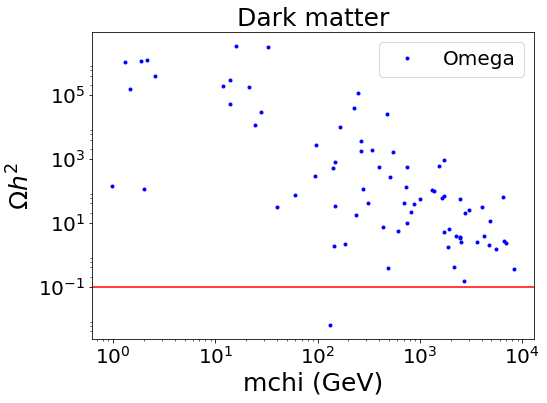

In [80]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mchi,xd.Omega,'b.')

plt.axhline(y=0.1, color='r', linestyle='-')

plt.title(r'Dark matter',size=25)
plt.xlabel(r'mchi (GeV)',size=25)
plt.ylabel(r'$\Omega h^2$',size=25)
plt.legend()

plt.tight_layout()

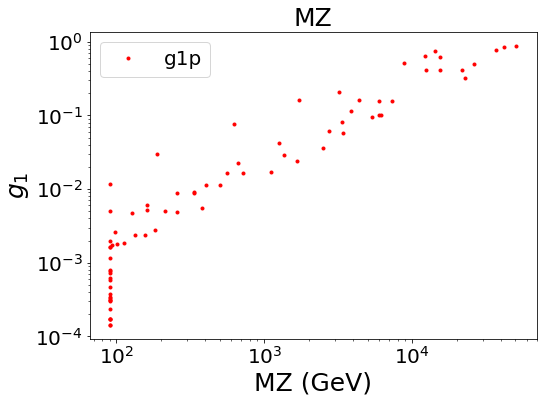

In [76]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MZp,xd.g1p,'r.')

plt.title(r'MZ',size=25)
plt.xlabel(r'MZ (GeV)',size=25)
plt.ylabel(r'$g_1$',size=25)
plt.legend()

plt.tight_layout()

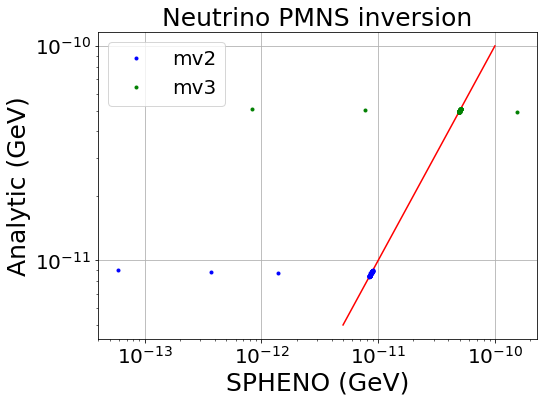

In [63]:
plt.figure(figsize=(8,6))

a = np.linspace(5e-12,1e-10,5)
plt.plot(a,a,'r-')

#plt.loglog(xd.mv1,xd.mn1,'bo')
plt.loglog(xd.mnu2,xd.mv2,'b.')
plt.loglog(xd.mnu3,xd.mv3,'g.')

plt.title(r'Neutrino PMNS inversion',size=25)
plt.xlabel(r'SPHENO (GeV)',size=25)
plt.ylabel(r'Analytic (GeV)',size=25)
plt.legend()

plt.grid()

plt.tight_layout()
#plt.savefig('plots/neutrino_masses_v2.pdf')

Diagonalization by hand

Neutrino $M_{ij}^{\nu}$ matrix:

\begin{equation}
M_{ik}^{\nu} = (h_d)^{\alpha i} \Lambda^{\alpha\beta} (h_e)^{\beta k}
\end{equation}

In [31]:
y=[]

for i in range(0,xd.shape[0]):
    
    a = neutrino_analytic_v2.Mab(xd.ZP22[i],xd.ZP23[i],xd.ZP24[i],xd.ZP25[i],xd.ZP32[i],xd.ZP33[i],\
                                 xd.ZP34[i],xd.ZP35[i],xd.ZP42[i],xd.ZP43[i],xd.ZP44[i],xd.ZP45[i],\
                                 xd.ZP52[i],xd.ZP53[i],xd.ZP54[i],xd.ZP55[i],xd.meD1[i],xd.meD2[i],\
                                 xd.mH2[i],xd.mH3[i],xd.mH4[i],xd.mH5[i],xd.VL11[i],xd.VL21[i],xd.UL11[i],\
                                 xd.UL21[i],xd.hd11[i],xd.hd12[i],xd.hd13[i],xd.hd21[i],xd.hd22[i],\
                                 xd.hd23[i],xd.he12[i],xd.he13[i],0.,xd.he22[i],xd.he23[i],0.)
    
    mn1 = a[0]
    mn2 = a[1]
    mn3 = a[2]
    
    y.append([mn1,mn2,mn3])

y=np.asarray(y)
yd=pd.DataFrame(y,columns=['mn1','mn2','mn3'])